In [39]:
import pandas as pd
import numpy as np

In [2]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import RMSprop

/home/mmblack/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/mmblack/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/mmblack/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/mmblack/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:5

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
train_data = pd.read_csv("data/train.csv")

In [78]:
train_data.shape

(42000, 785)

In [79]:
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [84]:
x = train_data.iloc[:,1:].to_numpy()
y = train_data.iloc[:,0].to_numpy()

# Split train and test data

In [85]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [86]:
from tensorflow.keras import backend as K

In [87]:
K.image_data_format()

'channels_last'

In [88]:
x_train.shape[0]

28140

In [89]:
if K.image_data_format() == 'channels_first':
    train_images = x_train.reshape(x_train.shape[0], 1, 28, 28)
    test_images = x_test.reshape(x_test.shape[0], 1, 28, 28)
    input_shape = (1, 28, 28)
else:
    train_images = x_train.reshape(x_train.shape[0], 28, 28, 1)
    test_images = x_test.reshape(x_test.shape[0], 28, 28, 1)
    input_shape = (28, 28, 1)
    
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
train_images /= 255
test_images /= 255

In [90]:
train_labels = tensorflow.keras.utils.to_categorical(y_train, 10)
test_labels = tensorflow.keras.utils.to_categorical(y_test, 10)

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


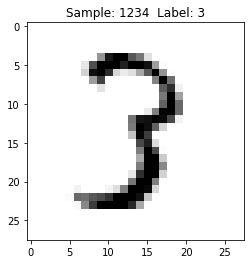

In [93]:
import matplotlib.pyplot as plt

def display_sample(num):
    #Print the one-hot array of this sample's label 
    print(train_labels[num])  
    #Print the label converted back to a number
    label = train_labels[num].argmax(axis=0)
    #Reshape the 768 values to a 28x28 image
    image = train_images[num].reshape([28,28])
    plt.title('Sample: %d  Label: %d' % (num, label))
    plt.imshow(image, cmap=plt.get_cmap('gray_r'))
    plt.show()
    
display_sample(1234)

In [96]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3),
                activation='relu',
                input_shape=input_shape))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [97]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)              

In [98]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [104]:
history = model.fit(train_images, train_labels,
                    batch_size=32,
                    epochs=30,
                    verbose=2,
                    validation_data=(test_images, test_labels))

Train on 28140 samples, validate on 13860 samples
Epoch 1/30
28140/28140 - 41s - loss: 0.0251 - acc: 0.9916 - val_loss: 0.0417 - val_acc: 0.9895
Epoch 2/30
28140/28140 - 41s - loss: 0.0247 - acc: 0.9916 - val_loss: 0.0429 - val_acc: 0.9900
Epoch 3/30
28140/28140 - 41s - loss: 0.0226 - acc: 0.9924 - val_loss: 0.0474 - val_acc: 0.9886
Epoch 4/30
28140/28140 - 41s - loss: 0.0210 - acc: 0.9930 - val_loss: 0.0462 - val_acc: 0.9886
Epoch 5/30
28140/28140 - 40s - loss: 0.0226 - acc: 0.9929 - val_loss: 0.0420 - val_acc: 0.9892
Epoch 6/30
28140/28140 - 40s - loss: 0.0216 - acc: 0.9929 - val_loss: 0.0422 - val_acc: 0.9894
Epoch 7/30
28140/28140 - 41s - loss: 0.0169 - acc: 0.9945 - val_loss: 0.0491 - val_acc: 0.9898
Epoch 8/30
28140/28140 - 41s - loss: 0.0171 - acc: 0.9936 - val_loss: 0.0503 - val_acc: 0.9890
Epoch 9/30
28140/28140 - 48s - loss: 0.0167 - acc: 0.9947 - val_loss: 0.0517 - val_acc: 0.9891
Epoch 10/30
28140/28140 - 50s - loss: 0.0156 - acc: 0.9945 - val_loss: 0.0547 - val_acc: 0.9885

In [103]:
score = model.evaluate(test_images, test_labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.042905156083068566
Test accuracy: 0.9876623


In [114]:
np.argmax(model.predict([[train_images[1234]]]))

3

# Load test data

In [142]:
test_data = pd.read_csv("data/test.csv")

In [143]:
x_test = test_data.to_numpy()

In [144]:
if K.image_data_format() == 'channels_first':
    test_images = x_test.reshape(x_test.shape[0], 1, 28, 28)
else:
    test_images = x_test.reshape(x_test.shape[0], 28, 28, 1)
    
test_images = test_images.astype('float32')
test_images /= 255

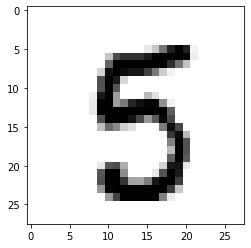

In [159]:
def display_sample(num):
    image = test_images[num].reshape([28,28])
    plt.imshow(image, cmap=plt.get_cmap('gray_r'))
    plt.show()
    
display_sample(10)

In [161]:
np.argmax(model.predict([[test_images[10]]]))

5

In [147]:
ImageId = []
Label = []

In [148]:
test_images.shape

(28000, 28, 28, 1)

In [149]:
for i in range(test_images.shape[0]):
    ImageId.append(i+1)
    Label.append(np.argmax(model.predict([[test_images[i]]])))

In [150]:
dict = {
    'ImageId': ImageId,
    'Label': Label}

In [151]:
df = pd.DataFrame(dict)
df.to_csv('out.csv', index=False)